<a href="https://colab.research.google.com/github/leovaldesz/Atividades-Aprendizagem-de-m-quina/blob/master/Semana%202/Semana2_Arvore_De_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Clássificação de insuficiência cardíaca

*   Dataset com atributos de pacientes que tiveram insuficiência cardíaca e um atributo classificador para se eles morreram ou não.
*   `https://www.kaggle.com/andrewmvd/heart-failure-clinical-data`
*   Atributos descrevem
  *   Idade
  *   Anemia
  *   Creatinafosfoquinase
  *   Diabetes
  *   Fração de ejeção
  *   Pressão sanguínea alta
  *   Plaquetas
  *   Creatinina sérica
  *   Sódio sérico
  *   Sexo
  *   Fumante 
  *   Tempo
  *   Evento de morte

## 2. Montando o ambiente no google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


## 3. Carregando os dados na memória

In [2]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Lendo csv
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 4. Limpeza e organização dos dados

In [4]:
dados.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## 5. Re-escala dos dados

In [5]:
dados = (dados - dados.min())/(dados.max() - dados.min())

## 6. Organizando dados para modelagem

#### Dividindo os dados em atributos descritores e atributo de classe

In [6]:
X = dados.iloc[:,:len(dados.columns)-1]
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [7]:
y = dados.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

#### Dividir dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
87,0.454545,1.0,0.005741,1.0,0.696970,1.0,0.338102,0.033708,0.771429,1.0,0.0,0.266904
130,0.236364,1.0,0.227737,0.0,0.696970,1.0,0.271427,0.022472,0.714286,1.0,1.0,0.362989
67,0.581818,1.0,0.011100,0.0,0.166667,0.0,0.301734,0.056180,0.771429,1.0,1.0,0.217082
146,0.218182,0.0,0.013907,0.0,0.242424,0.0,0.233847,0.022472,0.657143,1.0,1.0,0.384342
156,0.218182,1.0,0.004465,0.0,0.318182,0.0,0.305370,0.101124,0.657143,0.0,0.0,0.412811


In [11]:
y_train.head()

87     0.0
130    0.0
67     1.0
146    0.0
156    0.0
Name: DEATH_EVENT, dtype: float64

## 7. Definindo algoritmo de aprendizagem

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
#definindo modelo
classificador = DecisionTreeClassifier()

In [14]:
#treinando modelo
classificador.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
from sklearn.tree import plot_tree

In [16]:
#mudando o tamanho da figura
plt.rcParams["figure.figsize"] = (30,20)

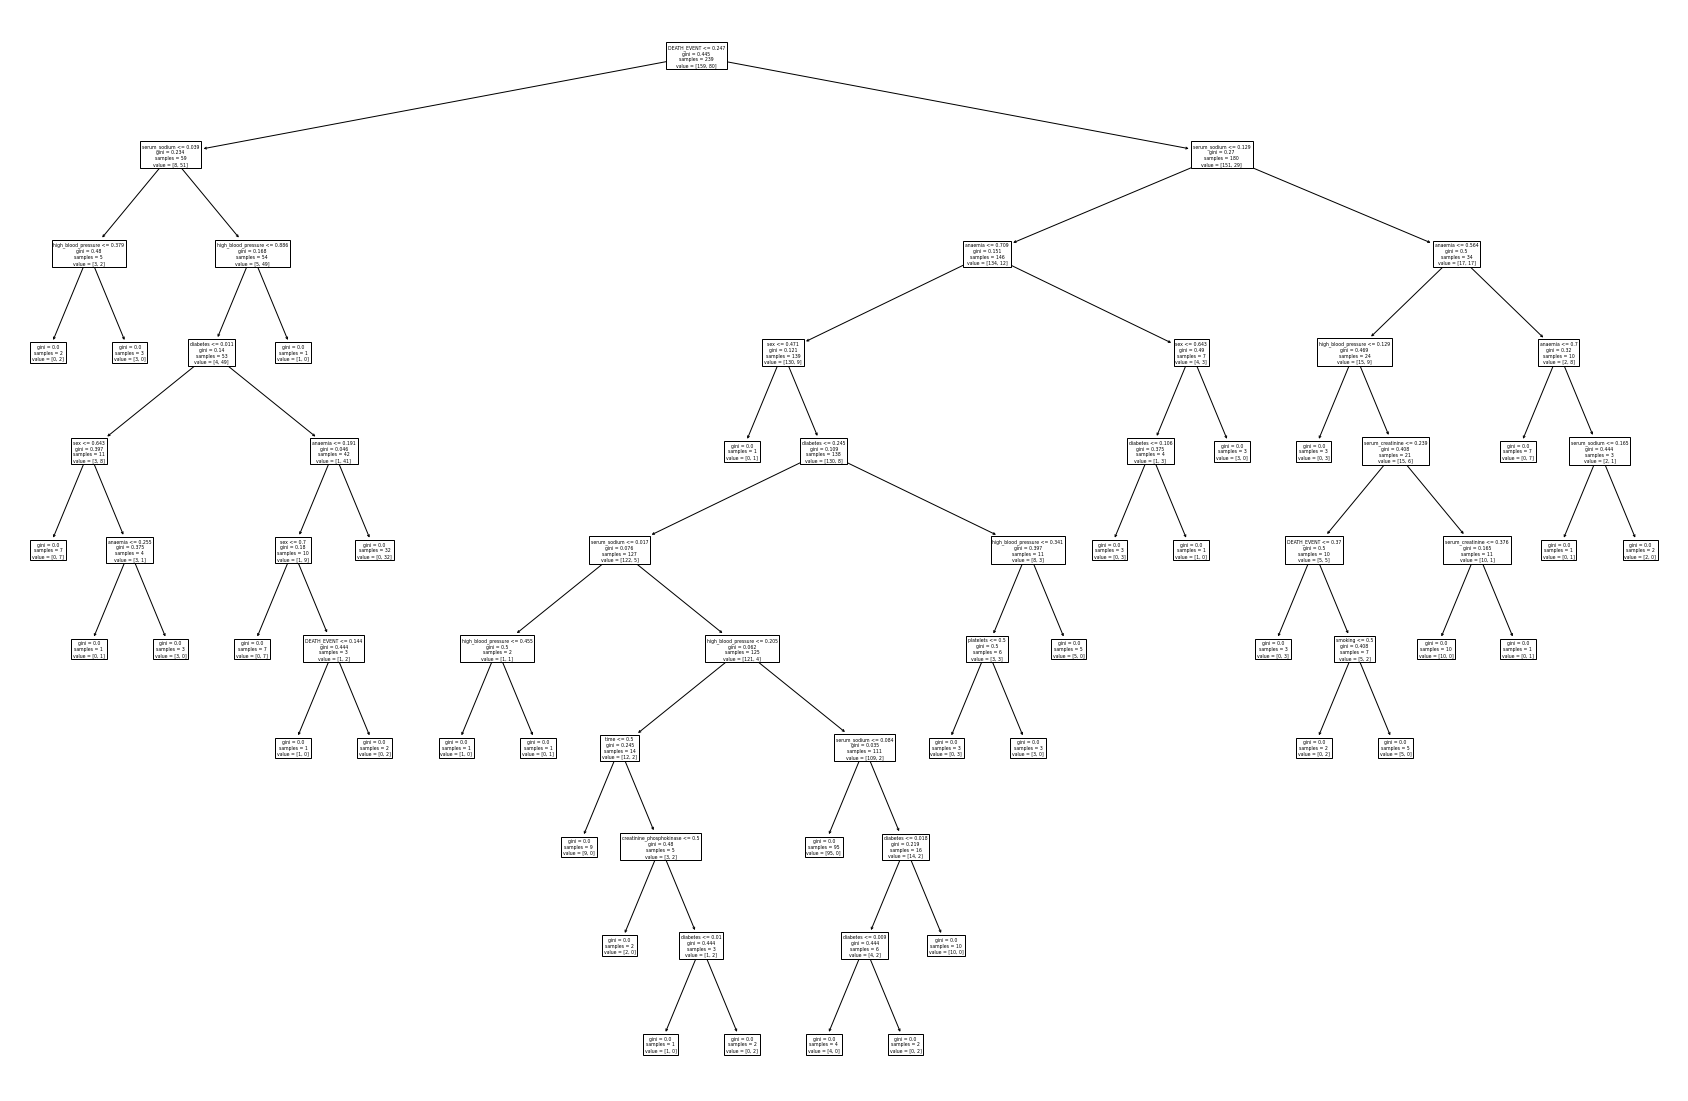

In [17]:
plot_tree(classificador, feature_names = dados.columns[1:])
plt.show()

In [18]:
# mudando tamanho da figura
plt.rcParams["figure.figsize"] = (8,6)

In [19]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [20]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
1.0 	 0.0
1.0 	 1.0
1.0 	 1.0
0.0 	 1.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
0.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0
0.0 	 0.0
1.0 	 1.0
0.0 	 0.0
0.0 	 0.0
1.0 	 0.0


## 8. Avaliação do classificador

In [21]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [22]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.7833333333333333

A acurácia foi boa, mas como o domínio do problema é muito delicado, era necessário uma melhor

In [23]:
#calculando precisão
from sklearn.metrics import precision_score

In [24]:
precisao = precision_score(y_test,classificacao)
precisao

0.5714285714285714

A precisão foi próxima da acurácia

In [25]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [26]:
recall = recall_score(y_test,classificacao)
recall

0.75

In [27]:
#calculando f1-score
from sklearn.metrics import f1_score

In [28]:
f1 = f1_score(y_test,classificacao)
f1

0.6486486486486486

Ambas as outras métricas tiveram resultados bons mas não satisfatórios

#### Curva ROC

In [29]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [30]:
fpr, tpr, _ = roc_curve(y_test,classificacao)

In [31]:
fpr

array([0.        , 0.20454545, 1.        ])

In [32]:
tpr

array([0.  , 0.75, 1.  ])

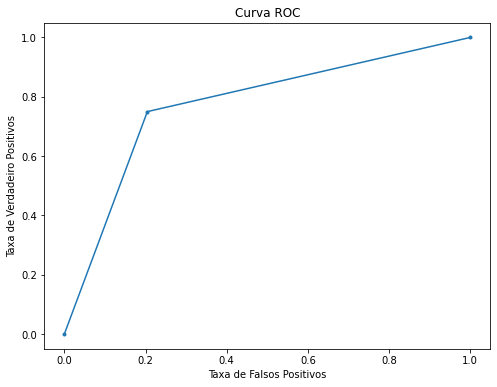

In [33]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

#### Área sob a curva

In [34]:
#calculando area sob a curva ROC
from sklearn.metrics import roc_auc_score

In [35]:
erro = roc_auc_score(y_test,classificacao)
erro

0.7727272727272727

#### Validação cruzada

In [36]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [37]:
kf = KFold(n_splits=5)

In [38]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298] 
Teste: [ 0  1  2  3 

In [39]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [40]:
#define modelo
classificador = DecisionTreeClassifier()

In [41]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.33333333, 0.66666667, 0.83333333, 0.83333333, 0.83333333,
       0.8       , 0.56666667, 0.63333333, 0.73333333, 0.62068966])

In [42]:
scores.mean(),scores.std()

(0.6854022988505747, 0.15045977011494255)

## 9. Comparação entre Árvore de decisão com Random Forest

#### Método Holdout

In [43]:
#definindo árvore de decisão
arvore = DecisionTreeClassifier()
arvore.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
#calculando acurácia da árvore de decisão
arvore.score(X_test,y_test)

0.7833333333333333

In [46]:
#calculando acurácia da random forest
floresta.score(X_train,y_train)

1.0

In [47]:
#realizando previsão com árvore de decisão
clf_arvore = arvore.predict(X_test)

In [48]:
#realizando previsão com random forest
clf_floresta = floresta.predict(X_test)

In [49]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,clf_arvore)

In [50]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,clf_floresta)

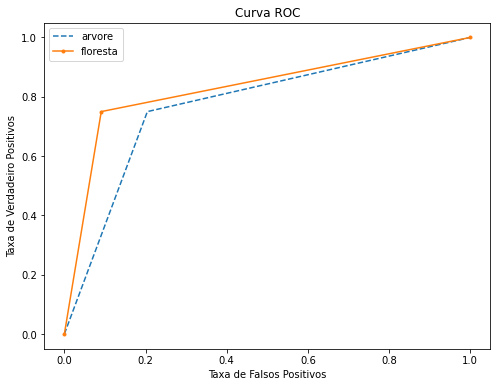

In [51]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

#### Validação Cruzada

In [52]:
#criando árvore
arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(arvore,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.699, 0.157)

In [53]:
#criando árvore
floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(floresta,X,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.756, 0.152)